In [1]:
# Harbinger Package
# version 1.0.737

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger-examples/main/jupyter.R")

#loading Harbinger
load_library("daltoolbox") 
load_library("harbinger") 
load_library("ggplot2")

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger

Loading required package: ggplot2



In [2]:
# Generate a synthetic multivariate time series dataset
set.seed(123)
n <- 100  # Number of time points
m <- 2   # Number of variables (companies)
data <- matrix(rnorm(n * m), nrow = n, ncol = m)
event <- rep(FALSE, n)

In [3]:
head(data)

-0.56047565,-0.71040656
-0.23017749,0.25688371
1.55870831,-0.24669188
0.07050839,-0.34754260
0.12928774,-0.95161857
1.71506499,-0.04502772


In [4]:
model <- fit(hmu_pca(), data)
pca_detection <- detect(model, data)
serie <- attr(pca_detection, "serie")

In [5]:
model <- fit(hanr_arima(), data[,1])
detection1 <- detect(model, data[,1])

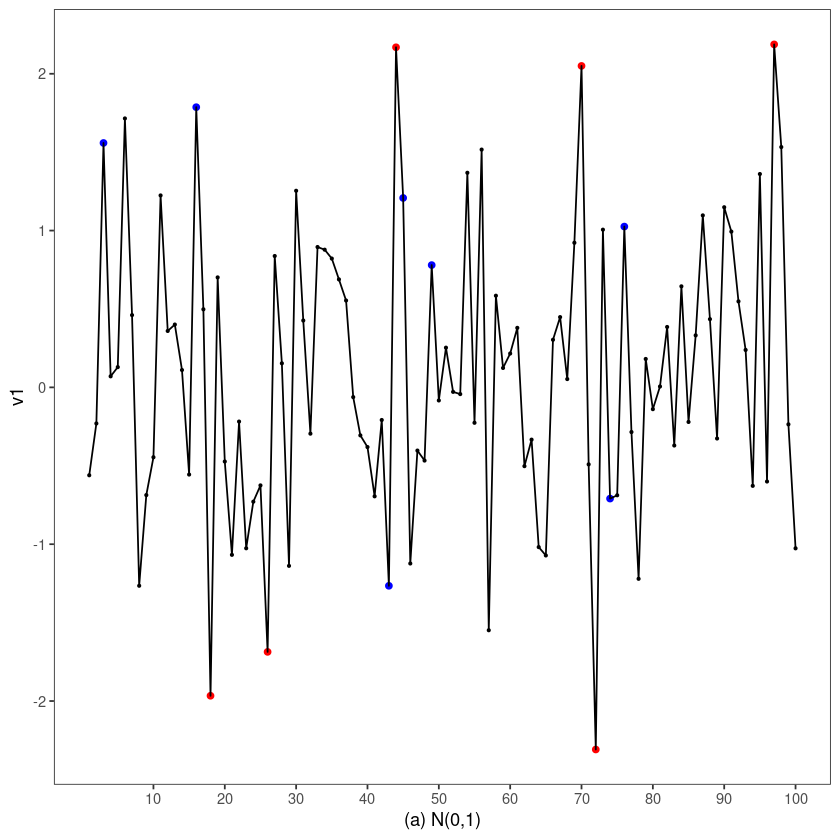

In [6]:
grf <- har_plot(model, data[,1], detection1, pca_detection$event)
grf <- grf + scale_x_continuous(breaks = seq(10, 100, by = 10), "(a) N(0,1)")
grf <- grf + ylab("v1")
grfA <- grf
plot(grfA)

In [7]:
model <- fit(hanr_arima(), data[,2])
detection2 <- detect(model, data[,2])

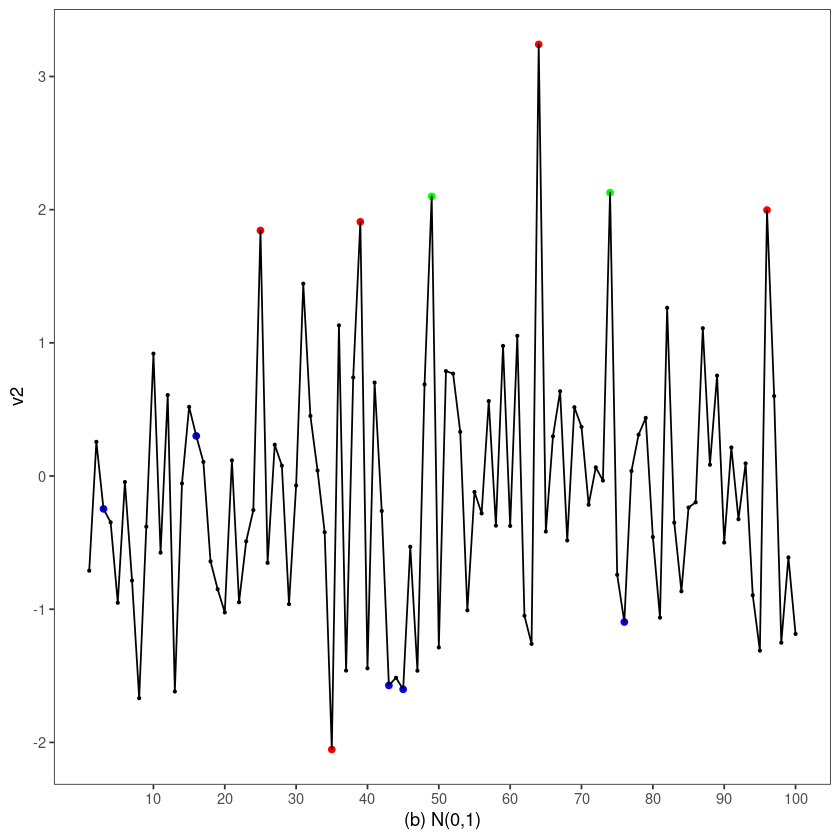

In [8]:
grf <- har_plot(model, data[,2], detection2, pca_detection$event)
grf <- grf + scale_x_continuous(breaks = seq(10, 100, by = 10), "(b) N(0,1)")
grf <- grf + ylab("v2")
grfB <- grf
plot(grfB)

In [9]:
detection <- detection1
detection$event <- (detection1$event | detection2$event) 

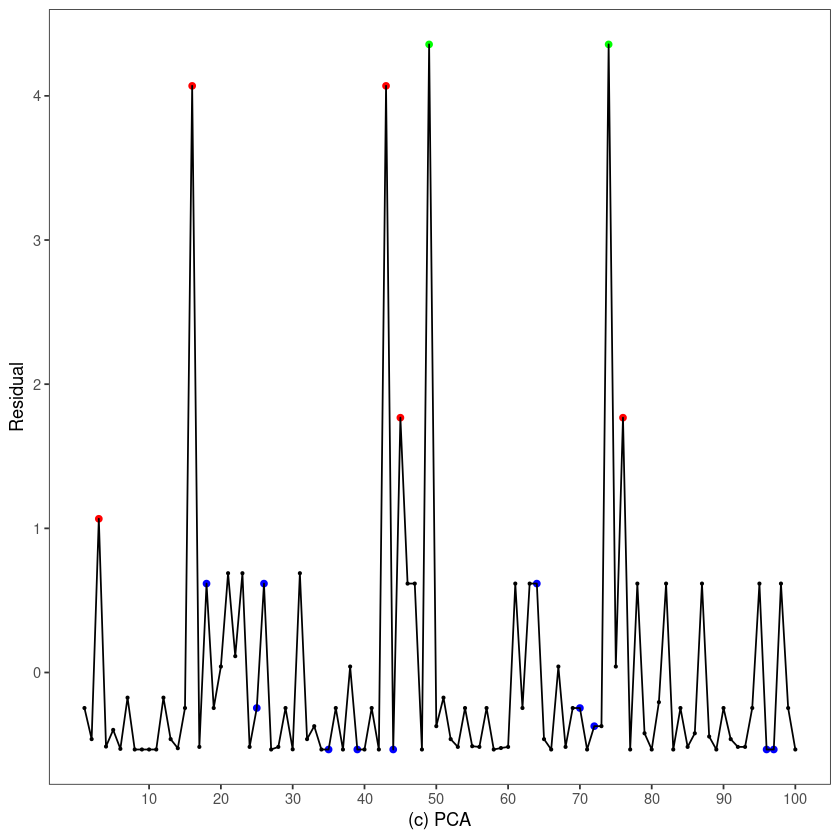

In [10]:
grf <- har_plot(model, serie, pca_detection, detection$event)
grf <- grf + scale_x_continuous(breaks = seq(10, 100, by = 10), "(c) PCA")
grf <- grf + ylab("Residual")
grfC <- grf
plot(grfC)